In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv('DANE_data.csv')
df = df[['Uses checking account', 'Uses savings account', 'Uses CDT',
          'Uses home purchase loan', 'Uses vehicle purchase loan',
          'Uses free investment loan', 'Uses credit card',
          'Uses other financial product','CLASE', 'Age', 
          'Household role', 'Region', 'Gender', 'Highest educational level achieved',
          'total_labor_income', 'Owns real estate property']]
df.shape

C:\Users\juane\AppData\Local\Temp\ipykernel_30160\1219318043.py:2: DtypeWarning: Columns (16,18,173,178) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DANE_data.csv')


(830743, 16)

In [4]:
#Answer Distribution For The Features Selected
for col in list(df.columns):
    print(df[col].value_counts(dropna=False))
    print("")

Uses checking account
NaN    827602
Yes      3141
Name: count, dtype: int64

Uses savings account
NaN    637229
Yes    193514
Name: count, dtype: int64

Uses CDT
NaN    829176
Yes      1567
Name: count, dtype: int64

Uses home purchase loan
NaN    823149
Yes      7594
Name: count, dtype: int64

Uses vehicle purchase loan
NaN    828637
Yes      2106
Name: count, dtype: int64

Uses free investment loan
NaN    814815
Yes     15928
Name: count, dtype: int64

Uses credit card
NaN    805167
Yes     25576
Name: count, dtype: int64

Uses other financial product
NaN    824091
Yes      6652
Name: count, dtype: int64

CLASE
Urban    720723
Rural    108960
NaN        1060
Name: count, dtype: int64

Age
16.0     13828
17.0     13645
15.0     13457
23.0     13370
14.0     13280
         ...  
103.0       11
104.0        4
108.0        4
107.0        3
105.0        2
Name: count, Length: 109, dtype: int64

Household role
Head of household                           290968
Son/daughter, stepchild      

In [5]:
#Impute Null Values For Financial Products
financialProducts = ['Uses checking account', 'Uses savings account', 'Uses CDT',
          'Uses home purchase loan', 'Uses vehicle purchase loan',
          'Uses free investment loan', 'Uses credit card',
          'Uses other financial product']

for product in financialProducts:
    df[product] = df[product].fillna('No')
    #print(df[product].value_counts())


In [6]:
#Impute Null Values For The Rest of The Features
df['CLASE'] = df['CLASE'].fillna('Urban', limit=921) #CLASE
df['CLASE'] = df['CLASE'].fillna('Rural', limit=139)

df['Household role'] = df['Household role'].fillna('Other relative') #Household Role

df['Household role'] = df['Household role'].fillna('Other relative') #Household Role

df['Region'] = df['Region'].fillna('Antioquia') #Region

df['Gender'] = df['Gender'].fillna('Female', limit=565) #Gender
df['Gender'] = df['Gender'].fillna('Male', limit=495)

df['Highest educational level achieved'] = df['Highest educational level achieved'].fillna('Does not know / No answer') #Highest educational level achieved

df['total_labor_income'] = df['total_labor_income'].fillna(0) #total_labor_income

df['Owns real estate property'] = df['Owns real estate property'].fillna('No') #total_labor_income

#print(df.isna().sum().sum())

In [7]:
#Count the different number of roles 
df['Household role'].value_counts(dropna=False)

Household role
Head of household                           290968
Son/daughter, stepchild                     279342
Partner, husband/wife, spouse, companion    138281
Worker                                       49603
Other non-relative                           19325
Domestic worker and their relatives          15603
Other relative                               15435
Grandchild                                   13728
Pensioner                                     8458
Name: count, dtype: int64

In [8]:
#Filter Data By Head of Household
df = df[df['Household role'] == 'Head of household']
df.shape

(290968, 16)

In [9]:
#Convert Colombia Currency to USD For Income
income = df['total_labor_income']
tempIncome = list()

for amount in income:
    if amount >= 0:
        amount = amount / 4322.82
        tempIncome.append(amount)
    else:
        tempIncome.append(0)

df['total_labor_income'] = tempIncome

In [33]:
#Income after removing 0s
income = df[df['total_labor_income'] != 0]['total_labor_income']
income.describe()

count    179901.000000
mean        413.810853
std         605.374519
min           0.001851
25%         166.557941
50%         300.729616
75%         427.961377
max       23595.708357
Name: total_labor_income, dtype: float64

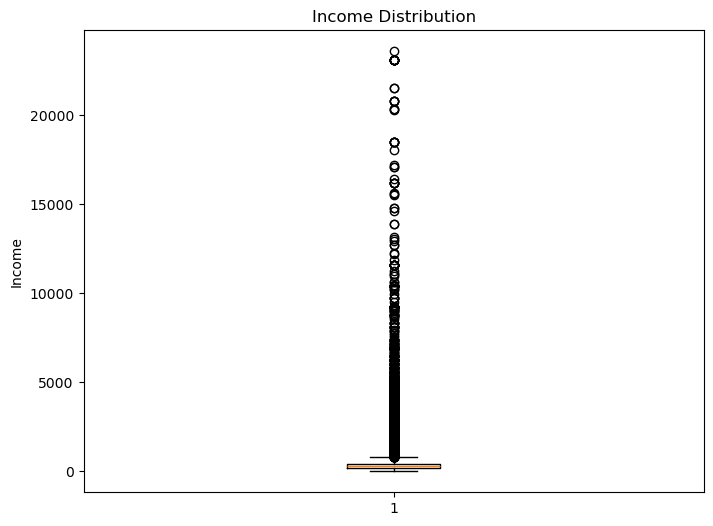

In [35]:
plt.figure(figsize=(8, 6))
plt.boxplot(income)
plt.title('Income Distribution')
plt.ylabel('Income')
plt.show()

In [71]:
print(np.percentile(income, 99.95))

9253.218963546944


In [ ]:
#Creates a feature that counts the number of financial products
numFinProducts = list()

for row in range(0, len(df)):
    count_yes = (df.iloc[row][0:7] == 'Yes').sum()
    numFinProducts.append(count_yes)

df['Financial Products Used'] = numFinProducts


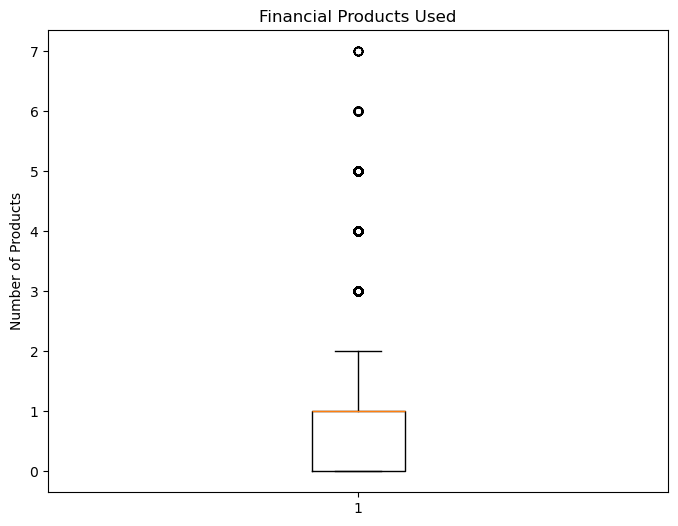

In [ ]:
#Financial Product Distribution Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Financial Products Used'])
plt.title('Financial Products Used')
plt.ylabel('Number of Products')
plt.show()

In [ ]:
#Financial Product Distribution Summary
df['Financial Products Used'].describe()

count    290968.000000
mean          0.852317
std           0.770889
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: Financial Products Used, dtype: float64

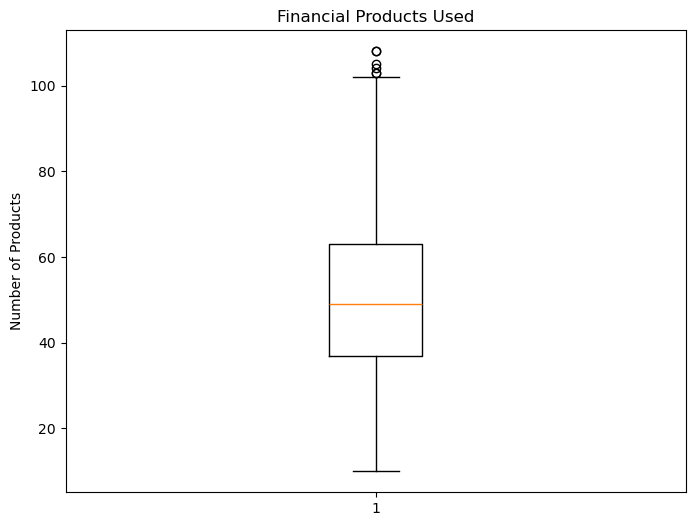

In [45]:
#Financial Product Distribution Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'])
plt.title('Financial Products Used')
plt.ylabel('Number of Products')
plt.show()

In [47]:
df['Age'].describe()

count    290968.000000
mean         50.120993
std          16.650207
min          10.000000
25%          37.000000
50%          49.000000
75%          63.000000
max         108.000000
Name: Age, dtype: float64

In [ ]:
#Save Dataframe
df.to_csv('Dane_Final.csv', index=False, encoding='utf-8')
